## Use of this Dataset

Describe how a business can use this dataset and a linear regression model. Try incorporating images, lists and tables.

Some of the ways a buisness may be able to use this dataset could be...
1. Adjusting the amount of each elements to reach the best quality wine
2. Categorizing wines based on their quality rating obtained through the amount of each element

## Loading Data

In [63]:
import numpy as np
import numpy as polyfit
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('winequality-red.csv', sep=";")

## Displaying Dataset Head and Tail

In [64]:
# Display dataset head
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [65]:
# Display dataset tail
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


## Information about the Dataset

From the tables above, we can see that the dataset contains values of chemicals in wine. These physicochemicals are recorded and a final quality rating was given. 

## Correlation Matrix and Heat Maps

In [66]:
# Display dataset's correlation matrix
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


## Data Heatmaps

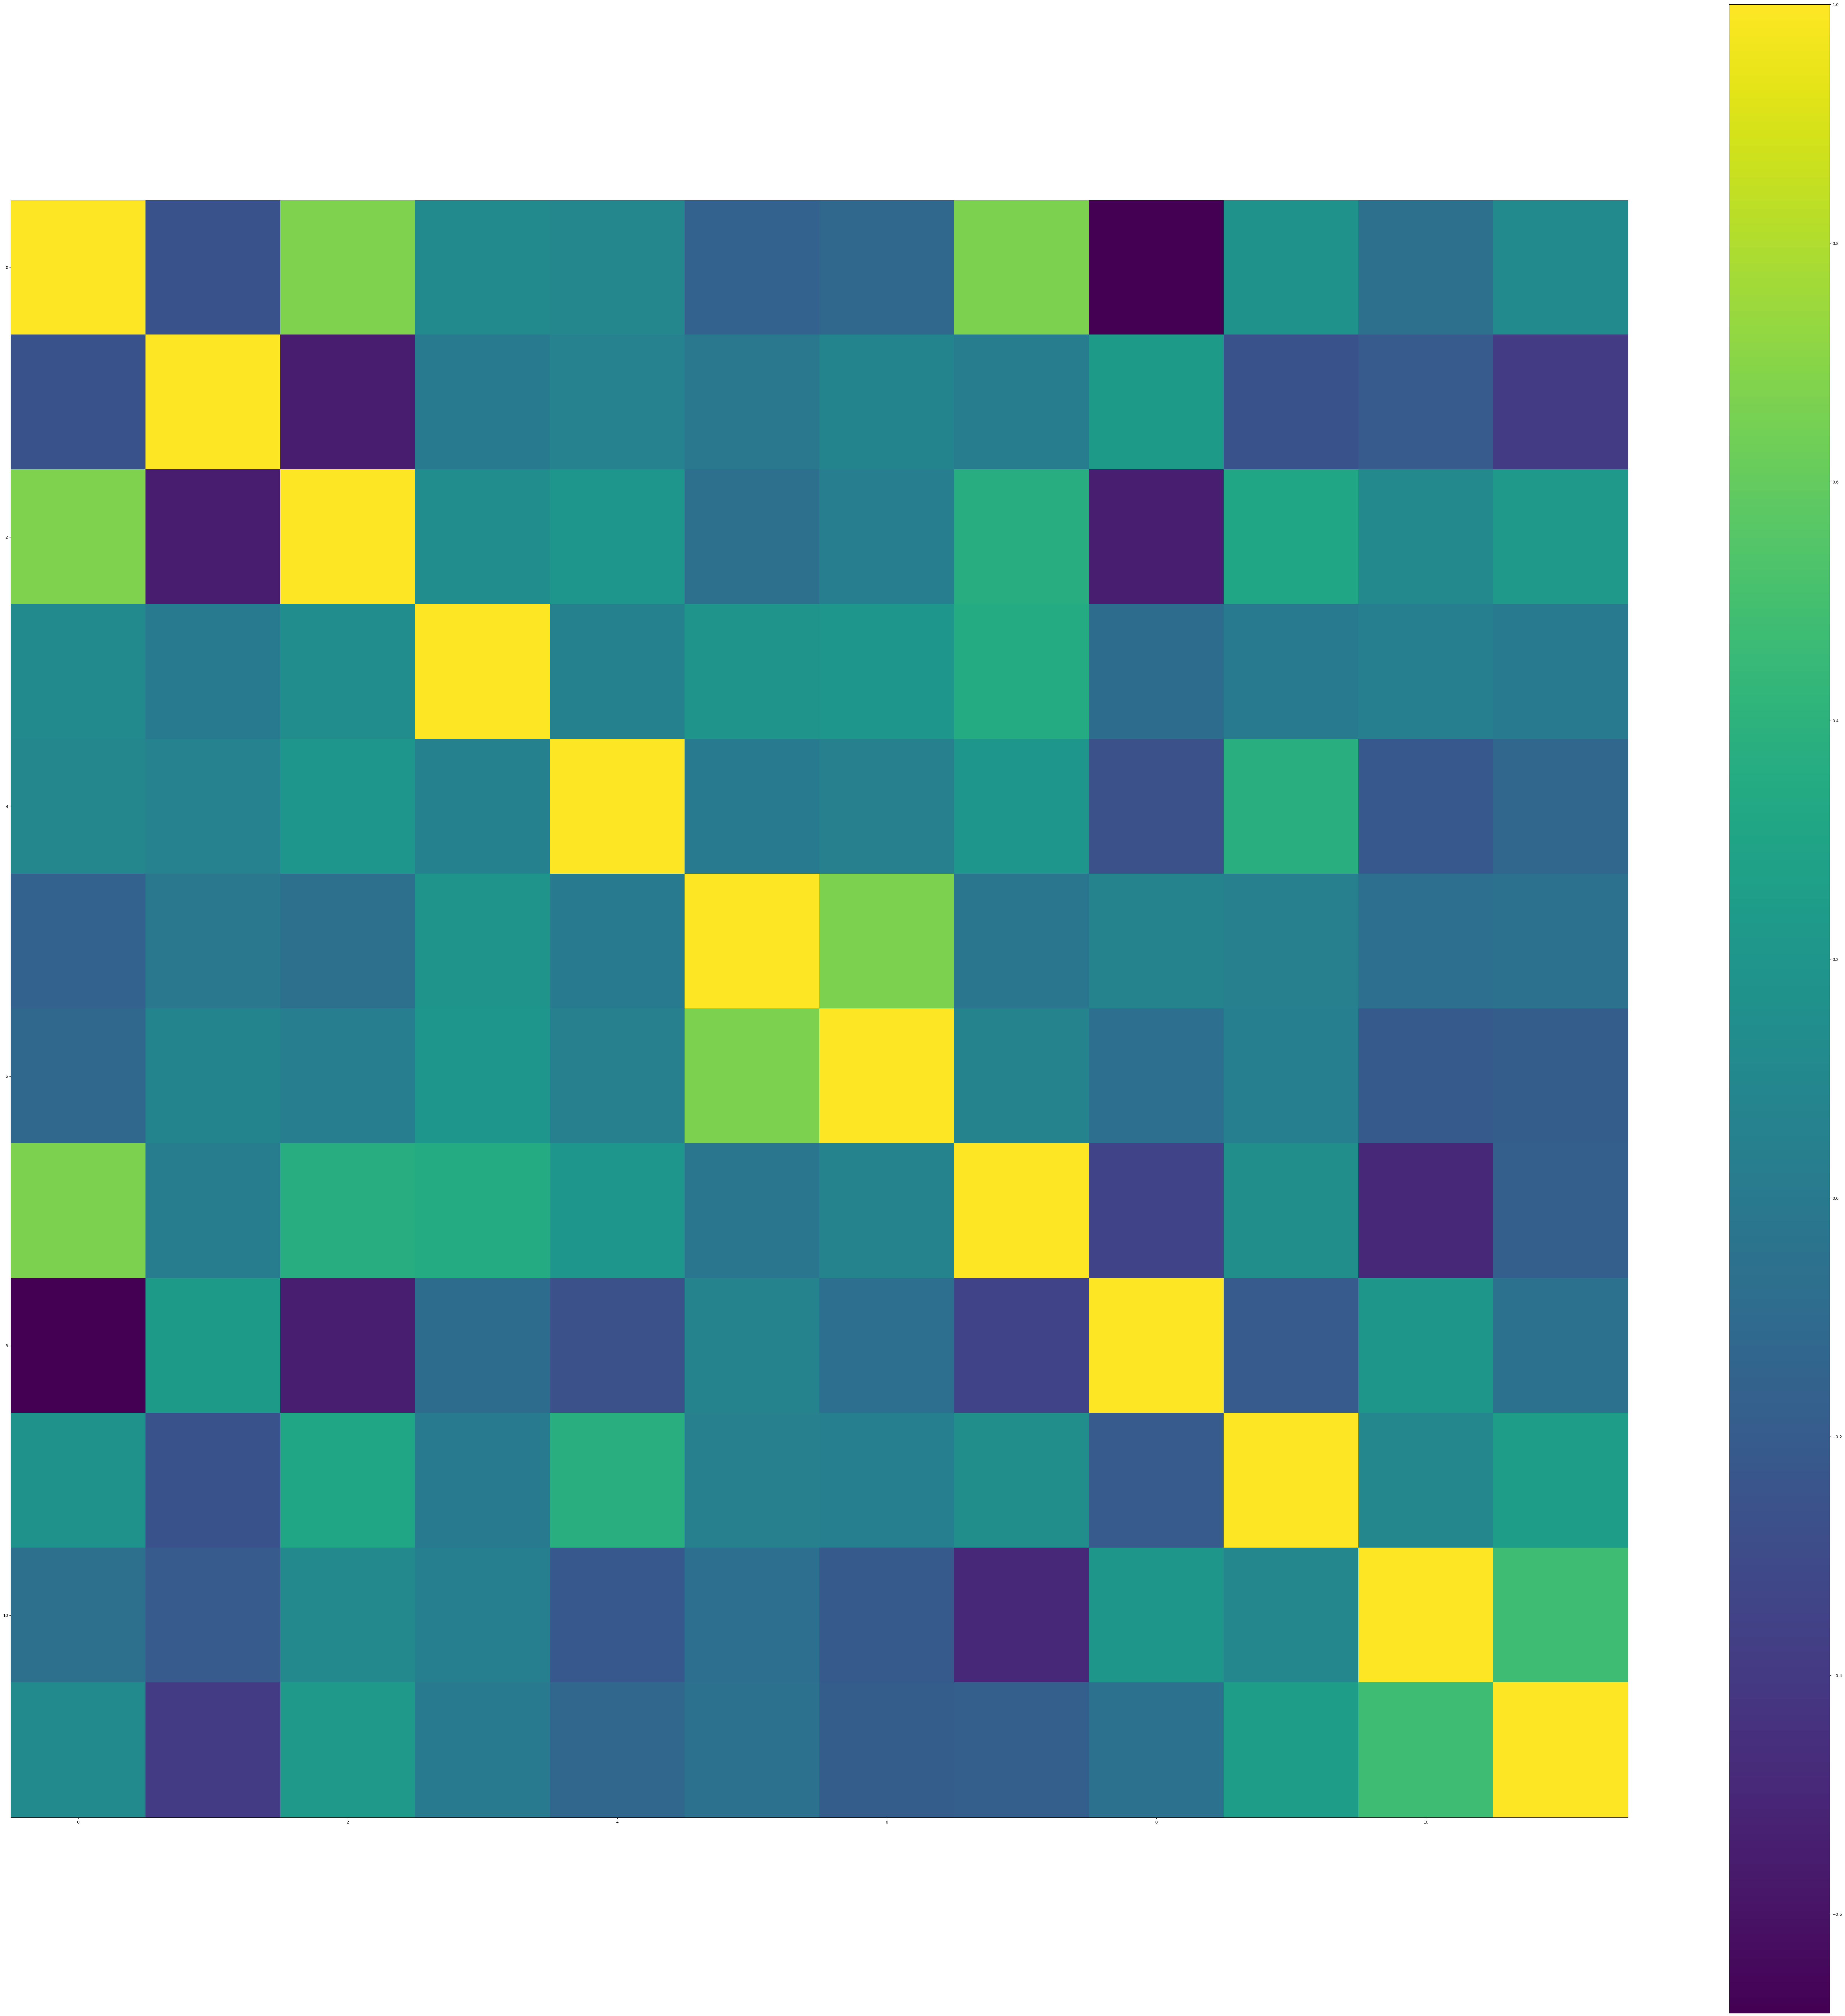

In [67]:
# Matplot Heatmap
fig, ax = plt.subplots(figsize=(90,90))
im = ax.imshow(df.corr(), interpolation='nearest')
fig.colorbar(im, orientation='vertical')

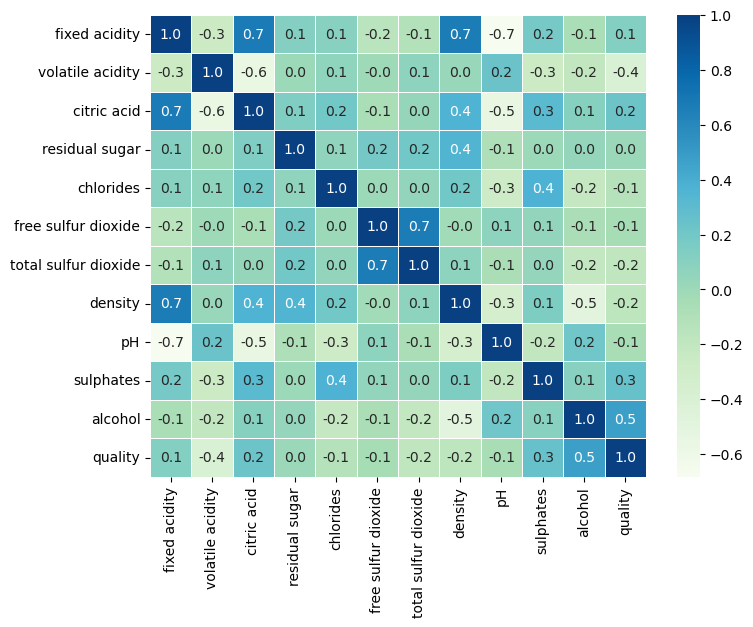

In [68]:
# Seaborn Heatmap
f,ax = plt.subplots(figsize=(8,6))
sns.heatmap(df.corr(), cmap="GnBu", annot=True, linewidths=0.5, fmt= '.1f',ax=ax)
plt.show()

## Sorting the Correlations

In [69]:
# Sorting the correlations
df.columns = df.columns.str.replace(' ', '_')
df.corr().quality.sort_values()

volatile_acidity       -0.390558
total_sulfur_dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free_sulfur_dioxide    -0.050656
residual_sugar          0.013732
fixed_acidity           0.124052
citric_acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

## Scatter Plot of the 3 Strong Correlations

<AxesSubplot: xlabel='citric_acid', ylabel='fixed_acidity'>

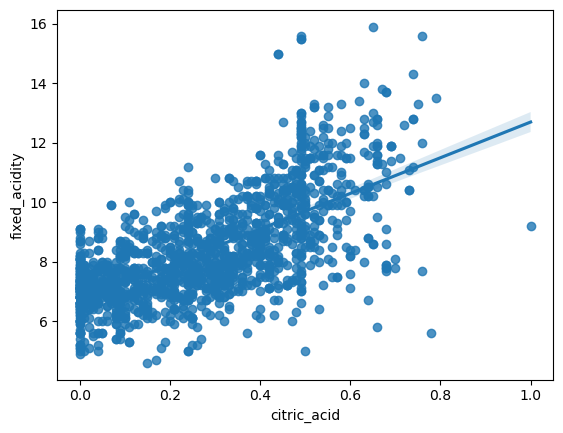

In [70]:
# Strong positive correlation, citric acid and fixed acidity
sns.regplot(x = df['citric_acid'], y = df['fixed_acidity'], data=df)

<AxesSubplot: xlabel='density', ylabel='fixed_acidity'>

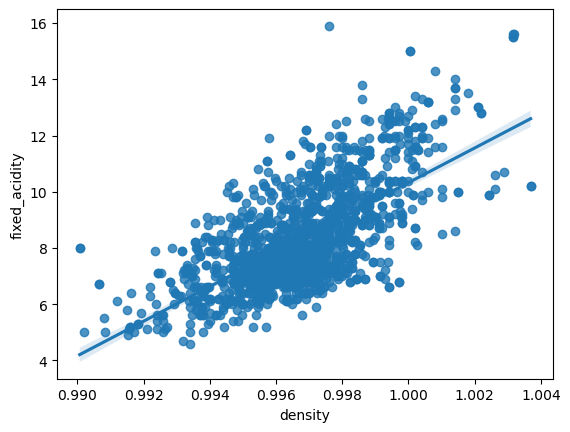

In [71]:
# Strong positive correlation, density and fixed acidity
sns.regplot(x = df['density'], y = df['fixed_acidity'], data=df)

<AxesSubplot: xlabel='pH', ylabel='fixed_acidity'>

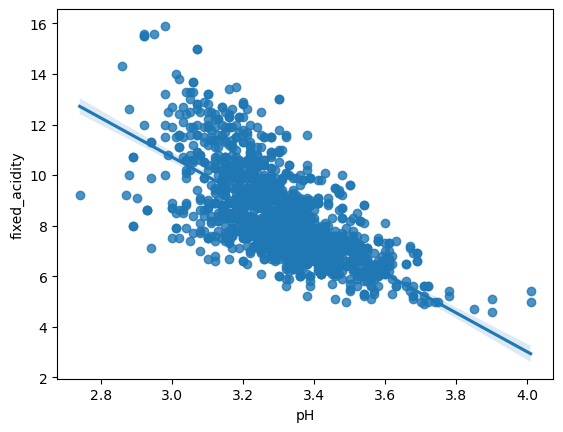

In [72]:
# Strong negation correlation, pH and fixed acidity
sns.regplot(x = df['pH'], y = df['fixed_acidity'], data=df)

## Split the data into testing and training

In [73]:
# Obtain and drop the target variable
target = df.loc[:,"quality"].values
x = df.drop(['quality'], axis = 1)

In [74]:
# Split the data into testing and training

# Import train test split library from sklearn
from sklearn.model_selection import train_test_split 
# Preform the split
x_train, x_test, y_train, y_test = train_test_split(x, target, test_size = 0.09, random_state = 0)

# Import linear model library from sklearn
from sklearn import linear_model
# Create linear regression object
logreg = linear_model.LogisticRegression(max_iter=7500)

# Train the model using training datasets
logreg.fit(x_train,y_train)

LogisticRegression(max_iter=7500)

In [75]:
# Testing the trained model using test datasets
test_model = logreg.predict(x_test)

# Show the accuracy of the model
print("Test model accuracy: " + str(logreg.score(x_test, y_test)))

Test model accuracy: 0.6388888888888888


## Comments on the accuracy of the model

From the results above, we can see that our model was trained, but it does not have a high accuracy. 

This could be caused by the inproper adjustments of the values within the parameters of the train_test_split, which as a result impacted on the model's accuracy. Some examples would be underfitting/overfitting the training data and the lack of tunning. 

## Creating Confusion Matrix

In [76]:
# Creating a confusion Matrix to id TP, FP, FN, TN

from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,test_model)
cf_matrix

array([[ 0,  4,  1,  0,  0],
       [ 0, 47, 13,  0,  0],
       [ 0, 17, 43,  4,  0],
       [ 0,  0, 11,  2,  0],
       [ 0,  0,  1,  1,  0]])

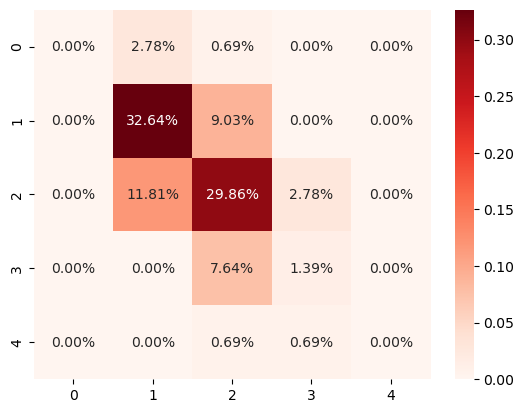

In [77]:
# Create a heatmap of the Confusion Matrix

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Reds')
plt.show()

## Making a Predication 

In [78]:
# Create dataFrame to run predicitons

column_names=['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

# Slightly modified original data for test data

test_prediction_array = [[6.2,0.6,0.08,2.3,0.080,32.0,44.0,0.99490,3.45,0.58,10.5]]
test_prediciton_df = pd.DataFrame(test_prediction_array, columns=column_names)

test_prediciton_df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,6.2,0.6,0.08,2.3,0.08,32.0,44.0,0.9949,3.45,0.58,10.5


In [79]:
# Predict
logreg.predict(test_prediciton_df)

array([6])